# Examen Interciclo
### Juan Carlos Benavides
### 25/Mayo/2020

In [225]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from time import time
from scipy.integrate import odeint
from random import randrange

import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

In [226]:
url = 'data.csv'
df = pd.read_csv(url)
df

,dias,recuperados
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
74,75,103
75,76,0
76,77,0
77,78,0


In [227]:
filtro = df["recuperados"][20:]


In [228]:
media = filtro.mean()
mediana = filtro.median()
print("Media:",media, "  Mediana:",mediana)

Media: 60.33898305084746   Mediana: 5.0


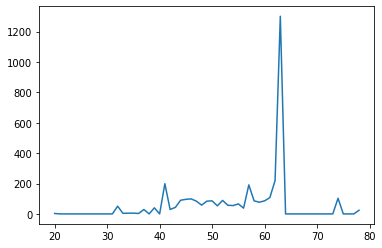

In [229]:
filtro.plot(x='dias', y='recuperados')

In [230]:
filtro = df["recuperados"]
print(filtro)
recup = []
acum = 0;
for i in range(len(filtro)):
    acum+=filtro[i]
    recup.append(acum)

recup
filtro=recup

0       0
1       0
2       0
3       0
4       0
     ... 
74    103
75      0
76      0
77      0
78     24
Name: recuperados, Length: 79, dtype: int64


In [231]:
x = range(1,len(filtro)+1) # Fecha
y = recup
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [51.78181597]
Independent term: 
 -1047.196689386563


## Lineal

### Grafica real

[3043.56677215]


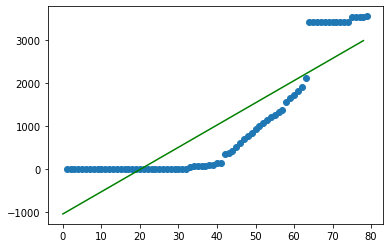

In [232]:
y_prediccion = regr.predict([[len(recup)]])
plt.scatter(x, y)
x_real=np.array(range(0, len(recup)))
print(y_prediccion)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Prediccion a 7 dias 

[3406.03948393]


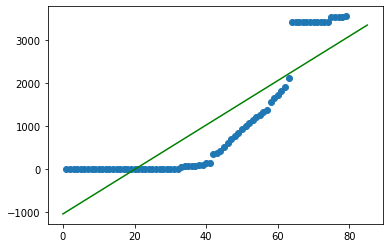

In [240]:
y_prediccion = regr.predict([[len(recup)+7]])
plt.scatter(x, y)
x_real=np.array(range(0, len(recup)+7))
print(y_prediccion)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Prediccion a 30 dias

[4597.02125122]


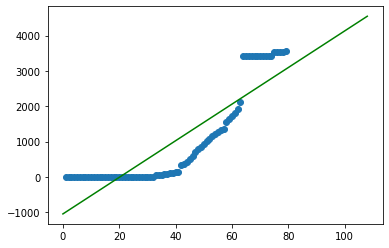

In [238]:
y_prediccion = regr.predict([[len(recup)+30]])
plt.scatter(x, y)
x_real=np.array(range(0, len(recup)+30))
print(y_prediccion)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

## Polinomial

### Datos actuales

3560


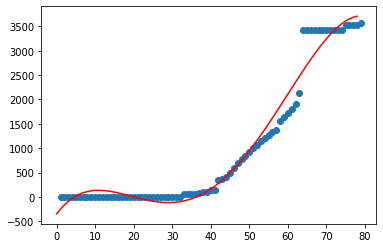

In [167]:
pred={}
for g in range(0,5):
    z = np.polyfit(x, y, g, full=True)
    pred[g]=z
    
xnuevo = np.array(range(0,len(filtro)))

for g,predi in pred.items():
    coefs, error, *_ = predi
    p = np.poly1d(coefs)

print(y[len(y)-1])
plt.scatter(x,y)
plt.plot(xnuevo, p(xnuevo),"r-")

### Prediccion a 7 dias

4597


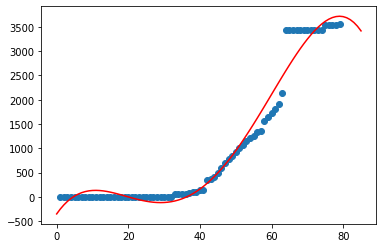

In [178]:
pred={}
for g in range(0,5):
    z = np.polyfit(x, y, g, full=True)
    pred[g]=z
    
xnuevo = np.array(range(0,len(filtro)+7))

for g,predi in pred.items():
    coefs, error, *_ = predi
    p = np.poly1d(coefs)

plt.scatter(x,y)
plt.plot(xnuevo, p(xnuevo),"r-")
print(int(y_prediccion[len(y_prediccion)-1]))

In [165]:
print(y[len(y)-1])

3560


### Prediccion a 30 dias

4597


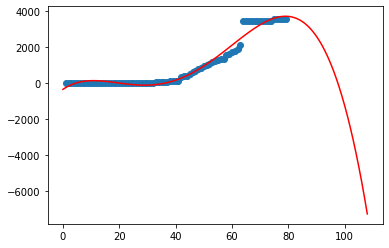

In [181]:
pred={}
for g in range(0,5):
    z = np.polyfit(x, y, g, full=True)
    pred[g]=z
    
xnuevo = np.array(range(0,len(filtro)+30))

for g,predi in pred.items():
    coefs, error, *_ = predi
    p = np.poly1d(coefs)

plt.scatter(x,y)
plt.plot(xnuevo, p(xnuevo),"r-")
print(int(y_prediccion[len(y_prediccion)-1]))

## Modelo Probabilidistico

In [146]:
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

29


### Datos actuales

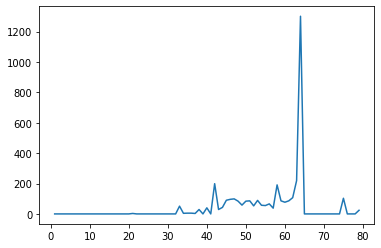

In [147]:
for i in range(x[-1], x[-1]):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x, y)
plt.show()

### Prediccion a 7 dias

86


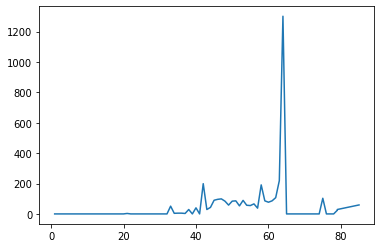

In [148]:
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x, y)
print(len(y[0:]))
plt.show()

### Prediccion a 30 dias

116
29


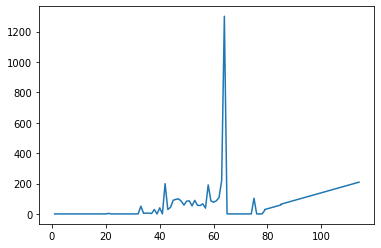

In [149]:
for i in range(x[-1], x[-1]+30):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x, y)
print(len(y[0:]))
print(prediccion_siguiente)
plt.show()

## Conclusión

En conclusión, el modelo que está más cerca de una predicción exitosa es el modelo polinomial, devuelve datos más exactos a comparación de los otros modelos y nos permite trabajar con gran cantidad de datos.

El modelo lineal nos sirve para valores escalables, es menos propenso al sobre ajuste, no puede graficar sistemas complejos.

El modelo polinomial se ajusta más a la realidad, pero es muy difícil encontrar el grado correcto al que modelar.

El modelo de probabilidad nos permite modelar métricas, pero es poco preciso y es difícil calcular e interpretar los resultados.


## Reinserccion Laboral

Personas con trabajo:  6168
Personas sin trabajo:  21078
Trabajan alimentacion:  1246
Trabajan ventas:  1243
Trabajan restaurante:  1221
Trabajan viajes:  1217
Trabajan hoteles:  1241


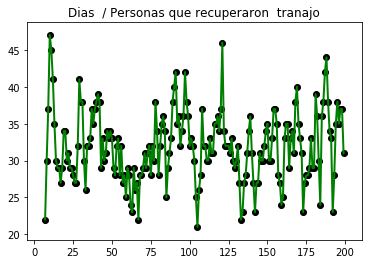

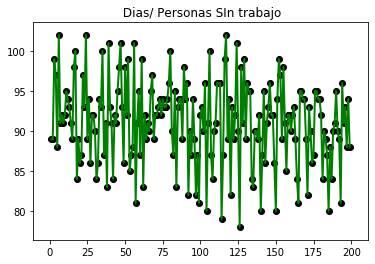

In [208]:
nconsultorios = 100
recuperados = 4597
tcrecimiento = 140
tdescanso =  5 
dtele = 10
dtele_aux = 4
nDias = 200
tiempo_evaluacion=1
nempresas = 1
#DICCIONARIOS
itotal={}
ialimentacion={}
iventas={}
irestaurante={}
iviajes={}
ihoteles={}
ndesempleados={}

class SimTrabajos(object):
    def __init__(self, env, num_lab, name):
            self.env = env
            self.num_lab=num_lab
            self.lab=simpy.Resource(env, num_lab)
            self.name = name
    def ntrabajo(self,persona):
        yield self.env.timeout(random.randint(dtele-5, dtele+5))
        
    def trabajo_ag(self,persona):
        yield self.env.timeout(random.randint(dtele_aux-3, dtele_aux+3))
        
    def reposo(self, persona):
        yield self.env.timeout(random.randint(tdescanso-5, tdescanso+5))
    
    def comprobar(self, persona):
        yield self.env.timeout(tiempo_evaluacion)
        

def llegada_paciente(env, SimTrabajos, persona):
    arrive = env.now
    vrfTrabajo = random.randint(1,100)
    if (vrfTrabajo <= 35): #verifica si es que tiene trabajo
        yield env.process(SimTrabajos.reposo(persona))
        ttrabajo=random.randint(1,5)
        if (ttrabajo == 1):  #Comprueba tipo de trabajo
            yield env.process(SimTrabajos.ntrabajo(persona))
            while True:
                with SimTrabajos.lab.request() as labs:
                    despera = random.randint(1,200)
                    requerimiento = yield labs | env.timeout(despera)
                    if labs in requerimiento:
                        yield env.process(SimTrabajos.comprobar(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(SimTrabajos.trabajo_ag(persona))
                        else:
                            itotal[env.now] = itotal[env.now] + 1 if env.now in itotal else  1
                            ialimentacion[env.now] = ialimentacion[env.now] + 1 if env.now in ialimentacion else  1
                            break   
        if (ttrabajo == 2):
            yield env.process(SimTrabajos.ntrabajo(persona))
            while True:
                with SimTrabajos.lab.request() as labs:
                    despera = random.randint(1,200)
                    requerimiento = yield labs | env.timeout(despera)
                    if labs in requerimiento:
                        yield env.process(SimTrabajos.comprobar(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(SimTrabajos.trabajo_ag(persona))
                        else:
                            itotal[env.now] = itotal[env.now] + 1 if env.now in itotal else  1
                            iventas[env.now] = iventas[env.now] + 1 if env.now in iventas else  1
                            break
        if (ttrabajo == 3):
            yield env.process(SimTrabajos.ntrabajo(persona))
            while True:
                with SimTrabajos.lab.request() as labs:
                    despera = random.randint(1,200)
                    requerimiento = yield labs | env.timeout(despera)
                    if labs in requerimiento:
                        yield env.process(SimTrabajos.comprobar(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(SimTrabajos.trabajo_ag(persona))
                        else:
                            itotal[env.now] = itotal[env.now] + 1 if env.now in itotal else  1
                            irestaurante[env.now] = irestaurante[env.now] + 1 if env.now in irestaurante else  1
                            break
        if (ttrabajo == 4):
            yield env.process(SimTrabajos.ntrabajo(persona))
            while True:
                with SimTrabajos.lab.request() as labs:
                    despera = random.randint(1,200)
                    requerimiento = yield labs | env.timeout(despera)
                    if labs in requerimiento:
                        yield env.process(SimTrabajos.comprobar(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(SimTrabajos.trabajo_ag(persona))
                        else:
                            itotal[env.now] = itotal[env.now] + 1 if env.now in itotal else  1
                            iviajes[env.now] = iviajes[env.now] + 1 if env.now in iviajes else  1
                            break
        if (ttrabajo == 5):
            yield env.process(SimTrabajos.ntrabajo(persona))
            while True:
                with SimTrabajos.lab.request() as labs:
                    despera = random.randint(1,200)
                    requerimiento = yield labs | env.timeout(despera)
                    if labs in requerimiento:
                        yield env.process(SimTrabajos.comprobar(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(SimTrabajos.trabajo_ag(persona))
                        else:
                            itotal[env.now] = itotal[env.now] + 1 if env.now in itotal else  1
                            ihoteles[env.now] = ihoteles[env.now] + 1 if env.now in ihoteles else  1
                            break    
    else:
        ndesempleados[env.now] = ndesempleados[env.now] + 1 if env.now in ndesempleados else  1


def ejecutar(env, t_crecimiento, recuperados):
    nomEmpresa = SimTrabajos(env,nconsultorios, "Name")
    for i in range(recuperados):
        asignar_Empresa(env, nomEmpresa, i)
    persona = recuperados
    while True:
        yield env.timeout(1)
        for i in range(t_crecimiento):
            persona += 1
            asignar_Empresa(env, nomEmpresa, persona)
                
def asignar_Empresa(env, nomEmpresa, persona):
    empre_esc = 1
    if (empre_esc == 1):
        env.process(llegada_paciente(env, nomEmpresa, persona))

        

env=simpy.Environment()
env.process(ejecutar(env,tcrecimiento, recuperados))
env.run(until=nDias)
datos=sorted(itotal.items())
x, y =zip(*datos)

print("Personas con trabajo: ",sum(itotal.values()))
print("Personas sin trabajo: ",sum(ndesempleados.values()))
print("Trabajan alimentacion: ",sum(ialimentacion.values()))
print("Trabajan ventas: ",sum(iventas.values()))
print("Trabajan restaurante: ",sum(irestaurante.values()))
print("Trabajan viajes: ",sum(iviajes.values()))
print("Trabajan hoteles: ",sum(ihoteles.values()))


pp.plot(x[1:],y[1:],linewidth=2,color='green')
pp.scatter(x[1:],y[1:],color='black')
pp.title("Dias  / Personas que recuperaron  tranajo")
pp.show()

if (ndesempleados):
    datos=sorted(ndesempleados.items())
    x, y =zip(*datos)
    pp.plot(x[1:],y[1:],linewidth=2,color='green')
    pp.scatter(x[1:],y[1:],color='black')
    pp.title(" Dias/ Personas SIn trabajo")
    pp.show()
    


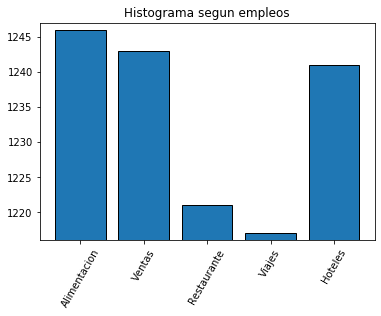

In [209]:
fechas = ['Alimentacion', 'Ventas', 'Restaurante', 'Viajes', 'Hoteles']
primas = [sum(ialimentacion.values()),sum(iventas.values()) , sum(irestaurante.values()), sum(iviajes.values()), sum(ihoteles.values())]

pp.bar(range(5), primas, edgecolor='black')

pp.xticks(range(5), fechas, rotation=60)
pp.title("Histograma segun empleos")
pp.ylim(min(primas)-1, max(primas)+1)
pp.show()